# Loading libraries and datasets

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('datasets/dataset.csv')
symptom = pd.read_csv('datasets/Symptom-severity.csv')
disease = pd.read_csv("datsets/Symptom_Description.csv")

Let's see how both the datasets look like

In [3]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
symptom.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


# Data preprocessing and feature engineering

Since the main dataset has a lot of spaces, we'll remove the spaces and let's also remove the underscores in both the datasets so both of them are consistent.

In [5]:
for i in data.columns:
    data[i] = data[i].str.replace(" ", "")
    data[i] = data[i].str.replace('_', '')
symptom["Symptom"] = symptom["Symptom"].str.replace('_', "")

Fill NA values with the value 'Not available' for now since the data is categorical. We'll label encode the dataset later.

In [6]:
data = data.fillna("Not available")

Let's use the symptom dataset to create a new feature called Total_weight. This column will contain the total weight of all the symptoms present in the column. Weight for each symptom is given in the symptom dataset.

In [7]:
weight_dict = {i:x for i,x in zip(symptom["Symptom"], symptom["weight"])}
data["Total_weight"] = data.replace(weight_dict).sum(axis=1)

Now let's label encode the categorical columns using scikit-learn's LabelEncoder library. Keep in mind that Disease column has to be encoded seperately because it contains different categorical values. We create 2 objects of the LabelEncoder class for Diseases and symptoms respectively. We immediately transform the Disease column and for the symptoms, we take the list of symptoms from the symptom dataset and fit our encoder on it and then we apply the transform on the symptom columns.

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_y = LabelEncoder()#Label Encoder for Disease column
lb_x = LabelEncoder()#Label Encoder for Symptom column

data["Disease"] = lb_y.fit_transform(data["Disease"])
all_symptoms = symptom["Symptom"].values
all_symptoms = np.append(all_symptoms, "Not available") #List of all symptoms and the NA value('Not available')
lb_x.fit(all_symptoms)
cat_columns = [i for i in data.columns if i!= "Total_weight"] #Columns containing categorical variables
data[cat_columns[1:]] = data[cat_columns[1:]].apply(lb_x.transform) #We select from the 1st index the 0th index contains the Disease column and we have already label encoded that


Now let's take a look at the dataset

In [9]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Total_weight
0,15,56,102,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,15,102,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
2,15,56,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
3,15,56,102,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,15,56,102,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


Now let's check which labels have been encoded as what

In [10]:
all_symptoms

array(['itching', 'skinrash', 'nodalskineruptions', 'continuoussneezing',
       'shivering', 'chills', 'jointpain', 'stomachpain', 'acidity',
       'ulcersontongue', 'musclewasting', 'vomiting',
       'burningmicturition', 'spottingurination', 'fatigue', 'weightgain',
       'anxiety', 'coldhandsandfeets', 'moodswings', 'weightloss',
       'restlessness', 'lethargy', 'patchesinthroat',
       'irregularsugarlevel', 'cough', 'highfever', 'sunkeneyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowishskin', 'darkurine', 'nausea',
       'lossofappetite', 'painbehindtheeyes', 'backpain', 'constipation',
       'abdominalpain', 'diarrhoea', 'mildfever', 'yellowurine',
       'yellowingofeyes', 'acuteliverfailure', 'fluidoverload',
       'swellingofstomach', 'swelledlymphnodes', 'malaise',
       'blurredanddistortedvision', 'phlegm', 'throatirritation',
       'rednessofeyes', 'sinuspressure', 'runnynose', 'congestion',
       'chestpain'

In [11]:
lb_x.transform(all_symptoms)

array([ 56, 102,  74,  26,  98,  20,  57, 109,   3, 120,  70, 123,  18,
       106,  42, 127,   6,  21,  66, 128,  94,  60,  82,  53,  27,  46,
       110,  15, 111,  30,  50,  45, 131,  29,  72,  61,  76,   7,  24,
         1,  32,  65, 132, 130,   4,  43, 114, 112,  64,  14,  83, 118,
        91, 100,  95,  23,  19, 125,  41,  77,  79,  13,  55,  73,  35,
        28,  17,  75, 117, 115,  87,  37,  16, 116,  38,  39,  36, 103,
        58,  47,  71, 107, 113,  67, 105,  62, 121, 126,  63,  10,  44,
        25,  81,  52, 119,  31,  54,  69,   5,  93,   8,   2,  33, 124,
        49,  84,  40,  68,  96,  59, 122,  89,  90,  22, 108,  34,  48,
        43,  12,  86,  80,  78,  88,   9,  97, 101,  99, 104,  51,  11,
        92, 129,  85,   0])

In [12]:
data["Disease"].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [13]:
lb_y.inverse_transform(data["Disease"].unique())

array(['Fungalinfection', 'Allergy', 'GERD', 'Chroniccholestasis',
       'DrugReaction', 'Pepticulcerdiseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'BronchialAsthma', 'Hypertension', 'Migraine',
       'Cervicalspondylosis', 'Paralysis(brainhemorrhage)', 'Jaundice',
       'Malaria', 'Chickenpox', 'Dengue', 'Typhoid', 'hepatitisA',
       'HepatitisB', 'HepatitisC', 'HepatitisD', 'HepatitisE',
       'Alcoholichepatitis', 'Tuberculosis', 'CommonCold', 'Pneumonia',
       'Dimorphichemmorhoids(piles)', 'Heartattack', 'Varicoseveins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo)ParoymsalPositionalVertigo', 'Acne',
       'Urinarytractinfection', 'Psoriasis', 'Impetigo'], dtype=object)

# Exploratory Data analysis

We divide the dataset into test and train randomly and we perform the EDA on the train dataset. [Stanford ESLII_print10 paper](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf) expains why we do this. If you don't want to read the entire paper then see the top answer of [Is it better to do exploratory data analysis on the training dataset only?](https://stats.stackexchange.com/questions/189678/is-it-better-to-do-exploratory-data-analysis-on-the-training-dataset-only) which explains this in a brief and concise manner.

Split the dataset into train and test.

In [14]:
split_test = np.random.rand(len(data))
split_test = split_test <= 0.8
train = data[split_test]#Train dataset
test = data[~split_test]#Test dataset

Import libraries for plotting

In [15]:
import matplotlib.pyplot as plt #Matplotlib
import seaborn as sns #Seaborn

Now let's see how the symptoms are arranged according to their frequency of occurences.

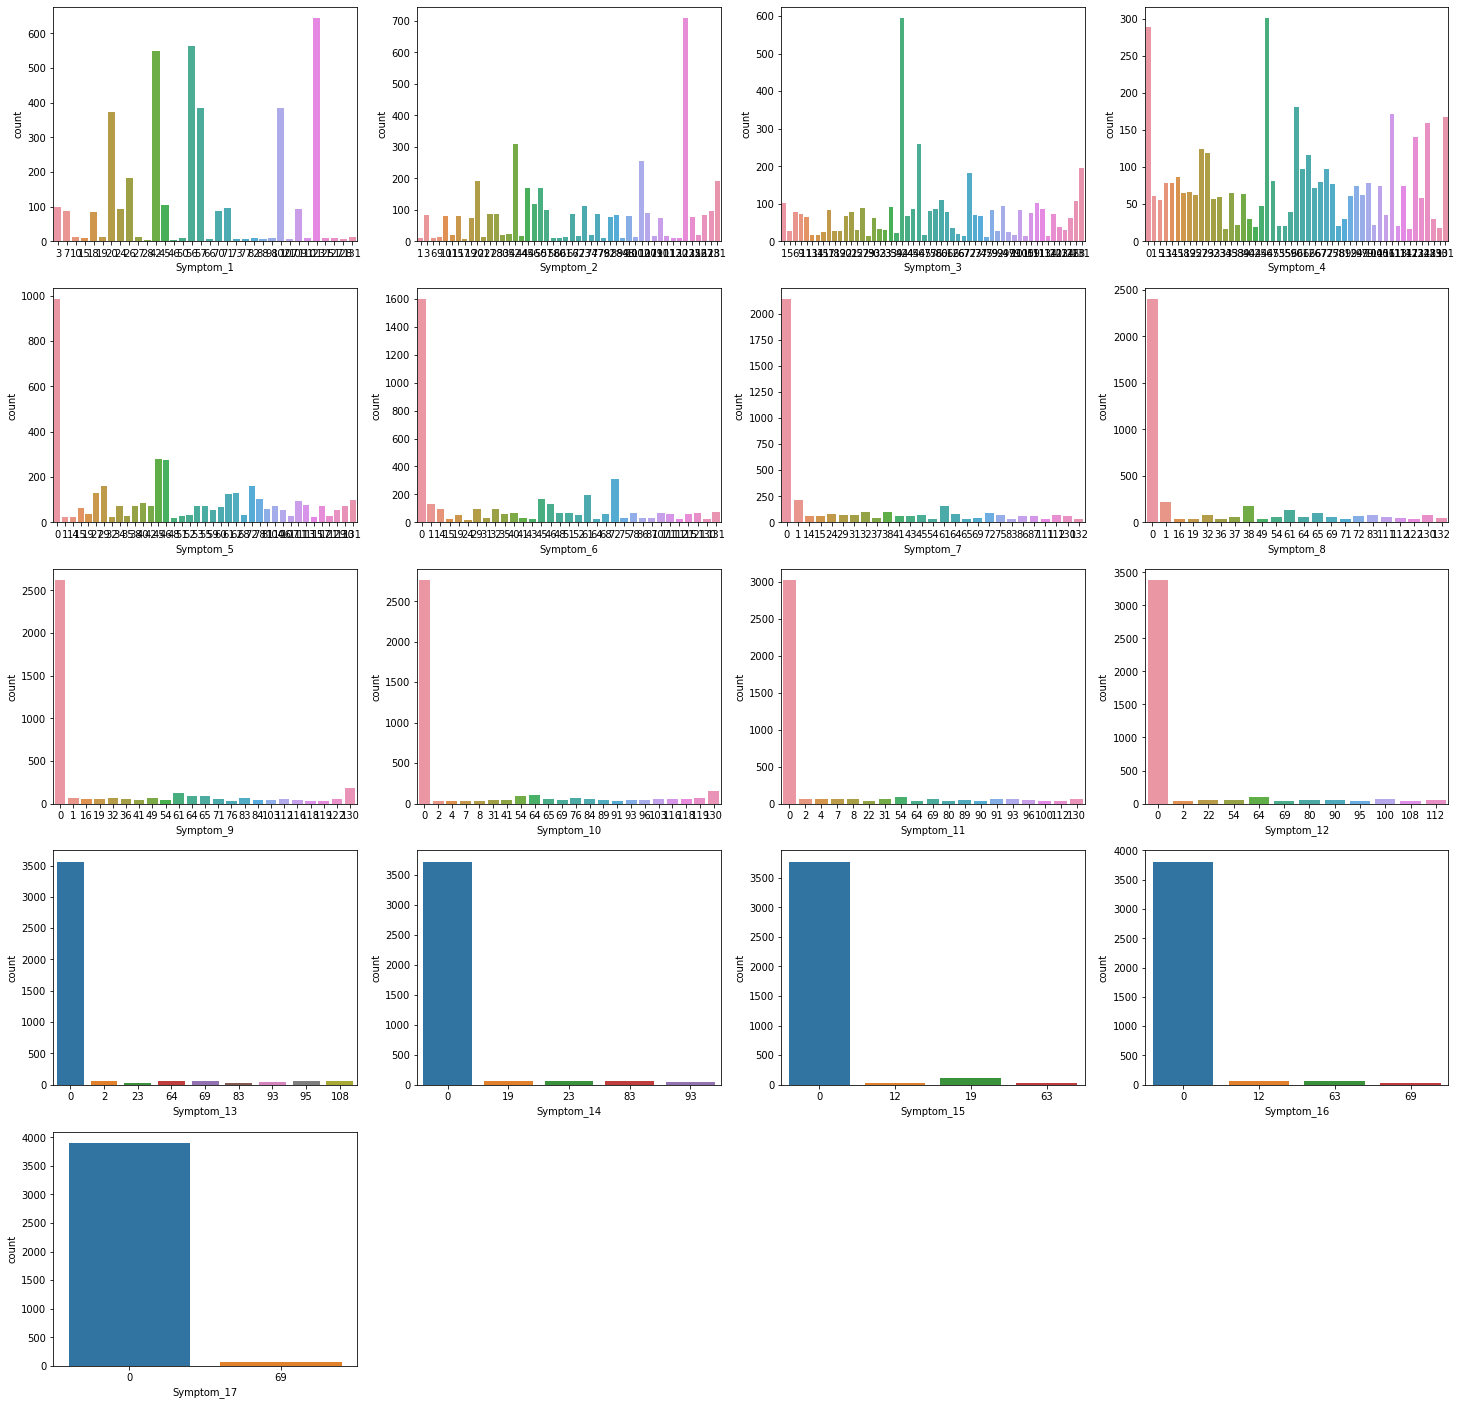

In [16]:
_, ax = plt.subplots(5,4, figsize=(25,25))
ax = ax.flatten()
for i in range(1,4):
    ax[-i].axis('off')
cat_columns_x = cat_columns[1:]
for i in range(17):
    sns.countplot(ax = ax[i],x= train[cat_columns_x[i]])




        

We see that there are more NA values than actual values Symptom_5 onward. Also number of actual values start to decrease significantly from Symptom_14 onwards.

Let's see how the diseases are arranged according to the weight of their symptoms.

C:\Users\govind\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:ylabel='Total_weight'>

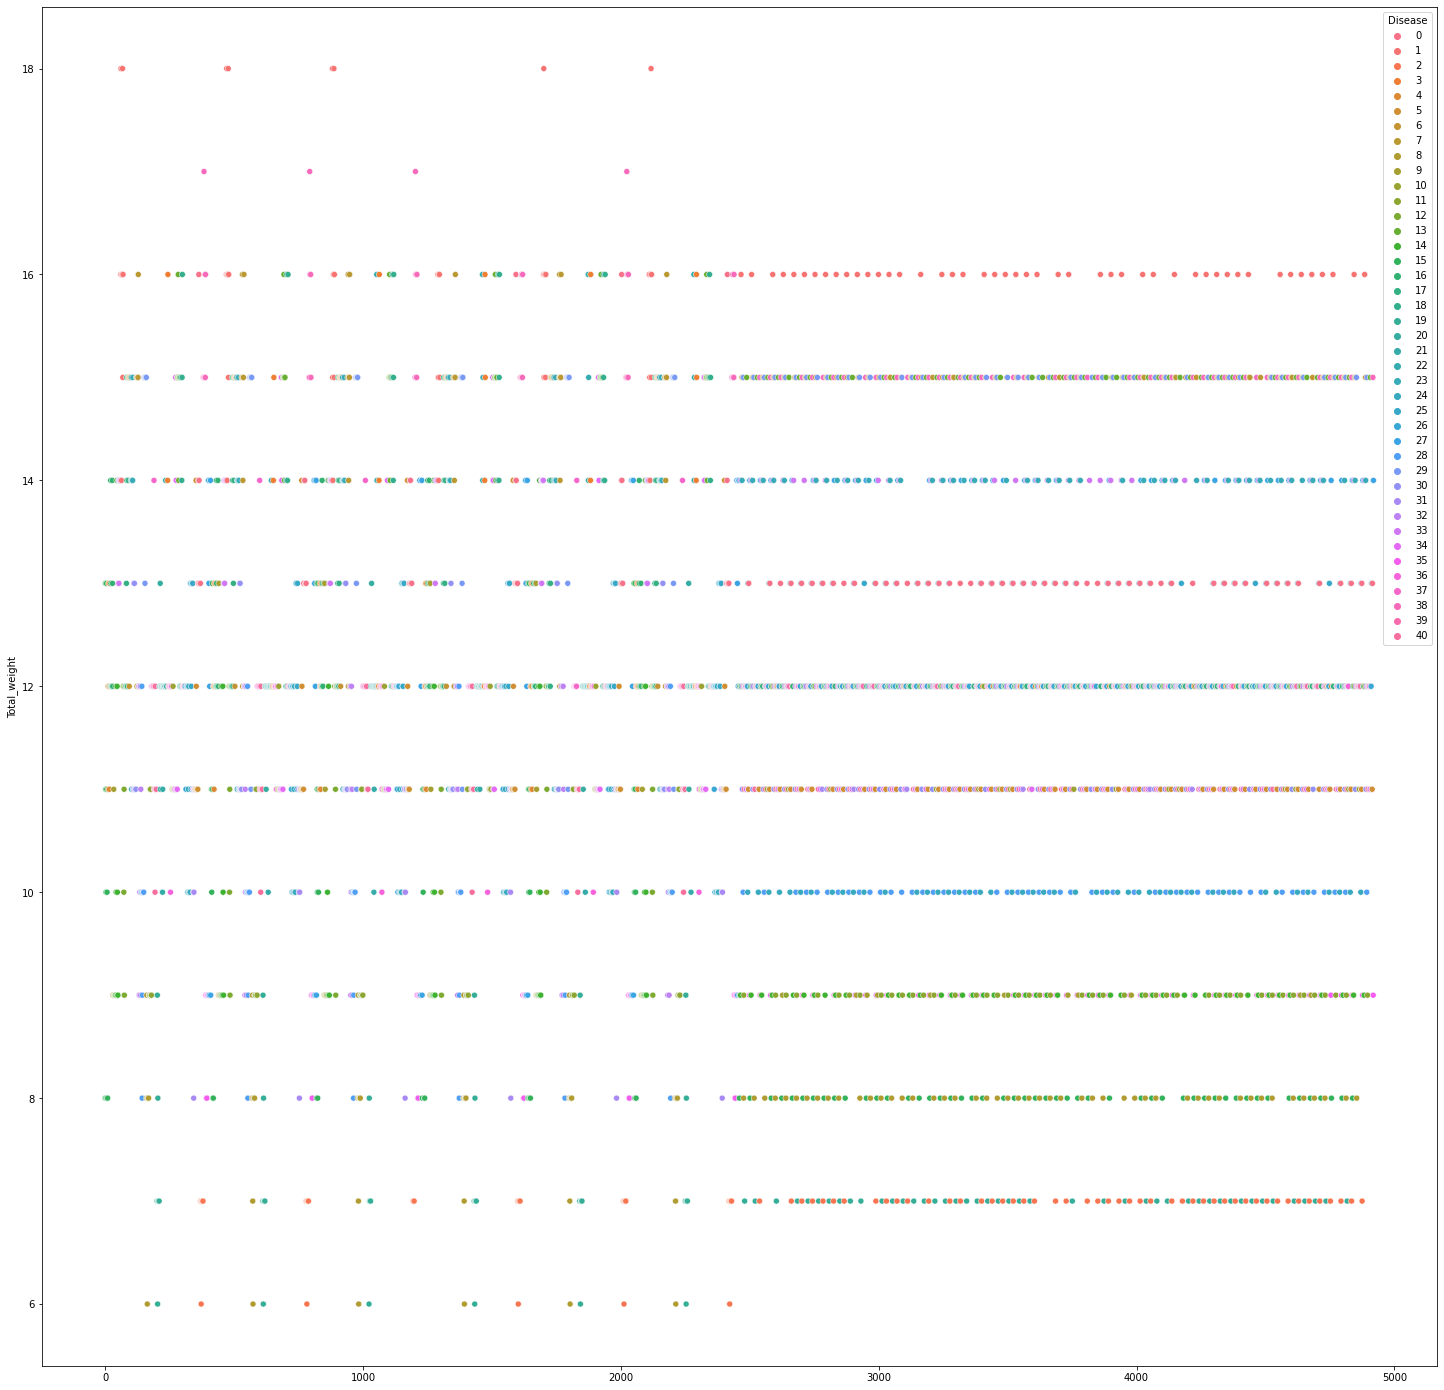

In [17]:
_, ax = plt.subplots(figsize=(25,25))
train[cat_columns] = train[cat_columns].astype("category")
sns.scatterplot(ax = ax, x = train.index, y = "Total_weight", data=train, hue="Disease")

Most of the diseases have total symptom weights between 7 and 16. Vertigo has the highest total weight of 18 followed by AIDS which has a total weight of 17.

Now let's check out the correlation heatmap between different columns. We will use pearson correlation which is used for analyzing categorical variables.

<AxesSubplot:>

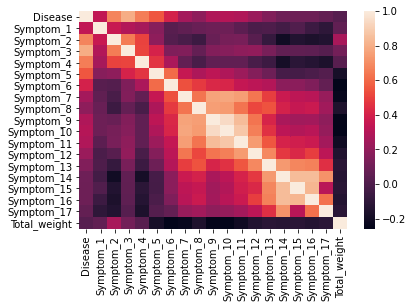

In [18]:
sns.heatmap(train.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson"))

We see that the Total_weight column has an almost perfect negative correlation or perfect anti-correlation with most of the columns. It also has close to 0 correlation with the Disease column(0.001709). Disease has an almost perfect correlation with the Symptom_3 column.

Let's drop Symptom_17 column as it is comprised of mostly null values and also has 0 correlation with the target variable

In [19]:
train = train.drop("Symptom_17", axis=1)
test = test.drop("Symptom_17", axis=1)

Let's train a model and see how it performs. This is also a part of the EDA.

In [20]:
from sklearn.metrics import accuracy_score
x_train = train.drop("Disease",axis=1)
y_train = train["Disease"]
x_valid = test.drop("Disease", axis=1)
y_valid = test["Disease"]

In [21]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=9)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=9)

Let's plot the feature importances of each variable to see how each column performed

<AxesSubplot:>

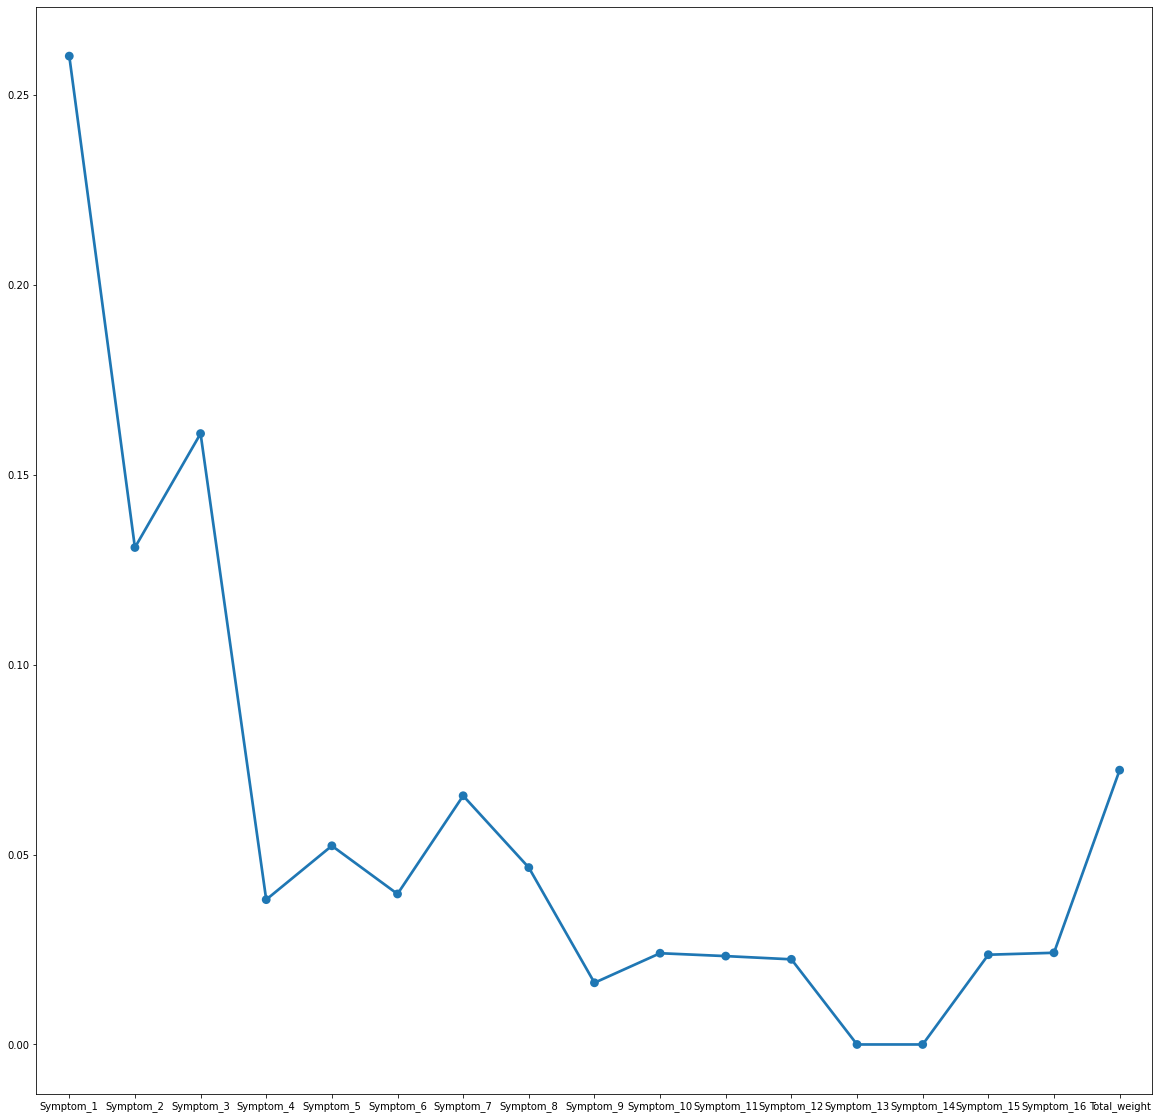

In [22]:
_,ax = plt.subplots(figsize=(20,20))
sns.pointplot(ax=ax,x= x_train.columns,y= dt.feature_importances_)

We see that Symptom_13 and Symptom_14 contributed nill to the prediction so let's drop them as well.
We also see that the weight of each feature decreases Symptom_7 onwards and takes a sudden spike at the Total_weight column. My guess is we can predict accurately with only 6 Symptoms and the total weight column and removing them won't affect the prediction significantly. Let's check this out.

In [22]:
cols_to_drop = ["Symptom_7","Symptom_8","Symptom_9","Symptom_10","Symptom_11","Symptom_12","Symptom_13","Symptom_14","Symptom_15", "Symptom_16"]
x_train = x_train.drop(columns=cols_to_drop)
x_valid = x_valid.drop(columns=cols_to_drop)
x = data.drop(columns=cols_to_drop)
x = x.drop(columns="Disease")
y = data["Disease"]

In [23]:
x_train.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Total_weight
0,56,102,74,33,0,0,8
1,102,74,33,0,0,0,13
2,56,74,33,0,0,0,11
3,56,102,33,0,0,0,10
4,56,102,74,0,0,0,8


In [24]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)
accuracy_score(rf.predict(x_valid), y_valid)

0.9947643979057592

As we can see there's not much of a significant drop in the accuracy. Let's check the cross validation accuracy

In [25]:
from sklearn.model_selection import cross_val_score 
np.mean(cross_val_score(rf, x,y, cv=5 ))

0.9975609756097562

In [26]:
import pickle 
with open("model.pkl", "wb") as file:
    pickle.dump(rf, file=file)